<a href="https://colab.research.google.com/github/VenturaCerqueira/Bootcamp_ProjetoAlbum2021/blob/main/Projeto_cartas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto: Álbum 2021
*   Total de cromos: **212**

*   preço do livro illustrado capa brochura:**R$ 10,00**

*   Envelope com 4 cromos: **R$ 4.00**

##Suposições:

1.   Todas as figurinhas tem igual probabilidade de serem sorteadas
2.   Um Pacote é comprado por vez até que se complete álbum

###Algoritmo
1. Compra um pacotinho de figurinha(4figurinhas cada, que podem se repetir)
2. Colar no álbum e verificar se o álbum está completo
3. Caso esteja incopleto, compra mais um pacote, caso contrario, fim.

####Perguntas
#####Lista:
1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Qual a probabilidade de se gastar menos que R\$1500,00 para completar o álbum?
5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?
8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?





In [ ]:
#Atribui valores
n_album = 212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10 
simulacoes = 1000

###Import Numpy

In [ ]:
import numpy as np

album = np.zeros(n_album)# representação do álbum 

pacotinho = np.random.choice(range(n_album), cromos_por_pacote)# representação do pacote de figurinhas

for i in pacotinho:# 'colando' as figurinhas obtidas no álbum
    album[i] += 1

In [ ]:
# comprando figurinhas até completar o álbum
def SimulaAlbum():
    album = np.zeros(n_album) 
    pacotes = 0                 #Zera Pacote
    while not np.all(album >= 1):
        pacotinho = np.random.choice(range(n_album), 4)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 
    valor_gasto = preco_album + preco_pacote * pacotes 

    return valor_gasto, pacotes

SimulaAlbum()

(1334, 331)

In [ ]:
def Simulacao(simulacoes = 1000, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum()[0])
        if not silencio:
            if (i+1) % 100 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim = Simulacao(simulacoes)

Simulação:  100 / 1000
Simulação:  200 / 1000
Simulação:  300 / 1000
Simulação:  400 / 1000
Simulação:  500 / 1000
Simulação:  600 / 1000
Simulação:  700 / 1000
Simulação:  800 / 1000
Simulação:  900 / 1000
Simulação:  1000 / 1000


In [ ]:
#questões 1 e 2
print('O valor médio gasto foi:', round(np.mean(sim), 2))
print('O numero de pacotes médio foi:', round((np.mean(sim) - preco_album)/preco_pacote, 2))

O valor médio gasto foi: 1270.58
O numero de pacotes médio foi: 315.14


###Importa Matplotlib.pyplot

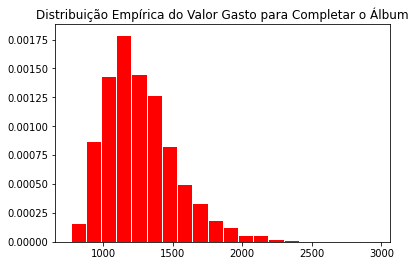

In [ ]:
#questão 3
import matplotlib.pyplot as plt
plt.hist(sim, bins = 20, density = True, color = 'red', edgecolor = 'white')#gera grafico, possivel altera cores...
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')#texto acima do grafico o titulo
plt.show()

In [ ]:
# questoes 4 e 5
prob1 = sum(np.array(sim) < 1500)/simulacoes
prob2 = sum(np.array(sim) > np.array(sim).mean())/simulacoes
 
print('A probabilidade de se gastar menos de 1500 é {:.2f}%'.format(prob1*100))
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))


A probabilidade de se gastar menos de 1500 é 83.30%
A probabilidade de se gastar mais do que a média é 42.60%


In [ ]:
# questao 6
qts = np.quantile(sim, [0.025, 0.975])
print('O intervalo de confiança de 95% para o gasto total é ({:.2f}, {:.2f})'.format(qts[0], qts[1]))

O intervalo de confiança de 95% para o gasto total é (886.00, 1918.00)


In [ ]:
# comprando figurinhas até completar o álbum
def SimulaAlbum(qtde_albuns = 1):
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(n_album), 4)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = qtde_albuns*preco_album + preco_pacote * pacotes 
    valor_gasto_por_album = valor_gasto/qtde_albuns

    return valor_gasto, pacotes, valor_gasto_por_album

SimulaAlbum(2)

(1660, 410, 830.0)

In [ ]:
def Simulacao(qtde_albuns, simulacoes = 1000, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum(qtde_albuns)[2])
        if not silencio:
            if (i+1) % 100 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim = Simulacao(qtde_albuns = 2, simulacoes = 100)

Simulação:  100 / 100


# Questões 7 e 8

In [ ]:

sim2 = Simulacao(2, 100, silencio = True) 
c2 = np.array(sim2).mean() 

sim3 = Simulacao(3, 100, silencio = True) 
c3 = np.array(sim3).mean()  

print('Custo médio entre 2 amigos:', round(c2, 2) )
print('Custo médio entre 3 amigos:', round(c3, 2) )

Custo médio entre 2 amigos: 864.92
Custo médio entre 3 amigos: 726.08


In [ ]:
import time
def SimulacaoAmigos(amigos = 40, simulacoes = 10):
    medias = []
    amigos = list(range(1, amigos + 1, 1))
    for i in amigos: 
        t = time.time()
        aux = Simulacao(i, simulacoes, silencio = True)
        tempo = round(time.time() - t, 2)
        print('Tempo total de {}s para a simulação com {} amigo(s)'.format(tempo, i))
        medias.append(np.array(aux).mean())
    return amigos, medias

sim_amigos = SimulacaoAmigos(amigos = 100, simulacoes = 5)

Tempo total de 0.17s para a simulação com 1 amigo(s)
Tempo total de 0.22s para a simulação com 2 amigo(s)
Tempo total de 0.28s para a simulação com 3 amigo(s)
Tempo total de 0.29s para a simulação com 4 amigo(s)
Tempo total de 0.33s para a simulação com 5 amigo(s)
Tempo total de 0.28s para a simulação com 6 amigo(s)
Tempo total de 0.51s para a simulação com 7 amigo(s)
Tempo total de 0.5s para a simulação com 8 amigo(s)
Tempo total de 0.45s para a simulação com 9 amigo(s)
Tempo total de 0.62s para a simulação com 10 amigo(s)
Tempo total de 0.57s para a simulação com 11 amigo(s)
Tempo total de 0.52s para a simulação com 12 amigo(s)
Tempo total de 0.73s para a simulação com 13 amigo(s)
Tempo total de 0.68s para a simulação com 14 amigo(s)
Tempo total de 0.67s para a simulação com 15 amigo(s)
Tempo total de 0.86s para a simulação com 16 amigo(s)
Tempo total de 0.94s para a simulação com 17 amigo(s)
Tempo total de 0.95s para a simulação com 18 amigo(s)
Tempo total de 0.79s para a simulação 

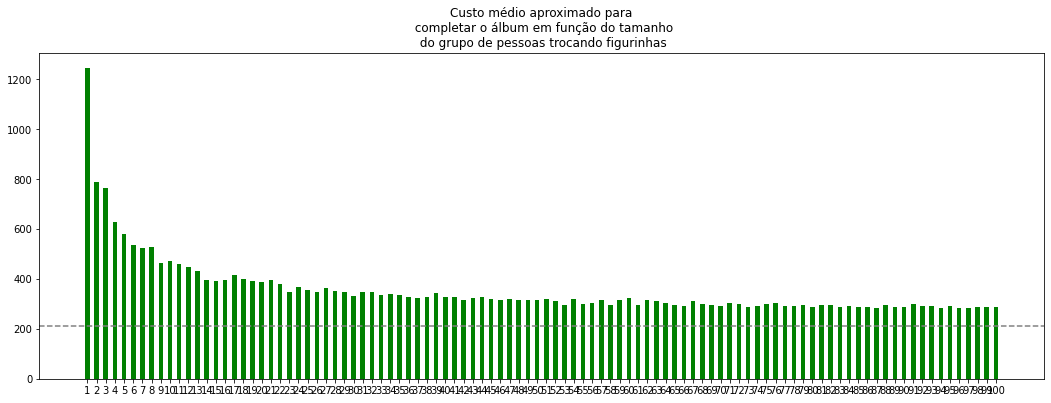

In [ ]:
import math
def GraficoCustoAmigos(simulacao):
    minimo_possivel = math.ceil(n_album/cromos_por_pacote)*preco_pacote 

    plt.figure(figsize=(18, 6))
    plt.bar(simulacao[0], simulacao[1], width = 0.5, color = 'green')
    plt.xticks(simulacao[0])
    plt.axhline(y = minimo_possivel, linestyle = 'dashed', color = 'gray')
    plt.title('Custo médio aproximado para\n completar o álbum em função do tamanho\n do grupo de pessoas trocando figurinhas')
    plt.show()

GraficoCustoAmigos(sim_amigos)

#Exercícios Complementares: 
###Python para Data Science 
  > Os exercícios abaixo foram pensados para que iniciantes desenvolvam manejo e intimidade programando em python, utilizando os recursos fundamentais da linguagem.

  > Os dois primeiros exercícios são mais simples. 
O exercício 3 já é um pouco mais elaborado e pode ser resolvido de várias formas. 
E o último exercício é apenas um complemento do projeto desenvolvido em aula sobre o álbum de figurinhas. 
  Foram feitas mais perguntas para serem respondidas com o experimento.

###Exercício 1
Considere um balde cuja base possui raio $r_1$ e altura igual ao diâmetro da base. Considere também uma esfera de raio $r_2$ cheia de água. Faça um programa que verifique se o volume da esfera cabe no balde, dados os valores de $r_1$ e $r_2$.

###Exercício 2
Crie uma função que simule o jogo do jokempô, isto é, dada a entrada de dois jogadores, retorne a indicação de qual deles venceu.

###Exercício 3
  > Faça um programa que simule uma slot machine. Uma slot machine é uma máquina muito comum em cassinos. 
  > A pessoa puxa uma alavanca e aparecem na tela 3 símbolos aleatoriamente, de uma lista com diversos deles. Se os símbolos forem iguais, então a pessoa ganha. 
  > A pessoa entrar com um tanto escolhido de fichas, e joga até que acabe. Quando o programa terminar, uma mensagem resumindo os totais que ela ganhou deve ser exibida.